# 项目：调查数据集（足球数据库！）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

在这段报告中, 主要针对足球数据库进行分析, 其中包含Player_Attributes, Player, Match, League, Country, Team, Team_Attributes表. 在数据整理完成后, 我们将集中对数据进行分析, 主要研究以下两个问题:
- 1)2010-2011赛季表现评分最高的球员, 评分与国家.
- 2)分析胜利与失败球队的球员属性, 他们之间的差距在哪里.
- 注意: 由于在数据库文件超过Github上载限制, 当在第一次执行此notebook时, 自动下载数据库文件到当前workspace目录, 此操作需要大致250-300M磁盘空间大小.

<pre>
表结构分析:
TABLE "Player_Attributes":
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,  # 球员属性ID(PK)
	`player_fifa_api_id`	INTEGER,            # 球员FIFA api ID(FK AS `Player`(`player_fifa_api_id`))
	`player_api_id`	INTEGER,                    # 球员api ID(FK AS `Player`(`player_api_id`))
	`date`	TEXT,                               # 日期(::DATE)
	`overall_rating`	INTEGER,                # 总体评分
	`potential`	INTEGER,                        # 潜力
	`preferred_foot`	TEXT,                   # 习惯用脚
	`attacking_work_rate`	TEXT,               # 攻击级别
	`defensive_work_rate`	TEXT,               # 防守级别
	`crossing`	INTEGER,                        # 传中
	`finishing`	INTEGER,                        # 射门
	`heading_accuracy`	INTEGER,                # 头球
	`short_passing`	INTEGER,                    # 短传
	`volleys`	INTEGER,                        # 抽射
	`dribbling`	INTEGER,                        # 盘带
	`curve`	INTEGER,                            # 弧线球
	`free_kick_accuracy`	INTEGER,            # 任意球
	`long_passing`	INTEGER,                    # 长传
	`ball_control`	INTEGER,                    # 控球
	`acceleration`	INTEGER,                    # 加速
	`sprint_speed`	INTEGER,                    # 速度
	`agility`	INTEGER,                        # 灵活
	`reactions`	INTEGER,                        # 反应
	`balance`	INTEGER,                        # 平衡
	`shot_power`	INTEGER,                    # 射门力量
	`jumping`	INTEGER,                        # 弹跳
	`stamina`	INTEGER,                        # 体力
	`strength`	INTEGER,                        # 强壮
	`long_shots`	INTEGER,                    # 远射
	`aggression`	INTEGER,                    # 侵略性
	`interceptions`	INTEGER,                    # 拦截
	`positioning`	INTEGER,                    # 站位
	`vision`	INTEGER,                        # 视野
	`penalties`	INTEGER,                        # 点球
	`marking`	INTEGER,                        # 盯人
	`standing_tackle`	INTEGER,                # 抢断
	`sliding_tackle`	INTEGER,                # 铲球
	`gk_diving`	INTEGER,                        # 守门扑救
	`gk_handling`	INTEGER,                    # 守门手控球
	`gk_kicking`	INTEGER,                    # 守门开球
	`gk_positioning`	INTEGER,                # 守门站位
	`gk_reflexes`	INTEGER,                    # 守门反应

TABLE `Player` :
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,    # 球员ID(PK)
	`player_api_id`	INTEGER UNIQUE,               # 球员api ID
	`player_name`	TEXT,                         # 球员名
	`player_fifa_api_id`	INTEGER UNIQUE,       # 球员fifa api id
	`birthday`	TEXT,                             # 生日(::DATE)
	`height`	INTEGER,                          # 身高
	`weight`	INTEGER                           # 体重

TABLE `Match` :
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,    # 比赛ID(PK)
	`country_id`	INTEGER,                      # 国家ID(FK AS `country`(`id`))
	`league_id`	INTEGER,                          # 联盟ID(FK AS `League`(`id`))
	`season`	TEXT,                             # 赛季
	`stage`	INTEGER,                              # 场次
	`date`	TEXT,                                 # 日期(::DATE)
	`match_api_id`	INTEGER UNIQUE,               # 比赛api ID
	`home_team_api_id`	INTEGER,                  # 主场队api ID(FK AS `Team`(`team_api_id`))
	`away_team_api_id`	INTEGER,                  # 客场队api ID(FK AS `Team`(`team_api_id`))
	`home_team_goal`	INTEGER,                  # 主场队进球数
	`away_team_goal`	INTEGER,                  # 客场队进球数
	`home_player_1`	INTEGER,                      # 主场队球员1(FK AS `Player`(`player_api_id`))
	`home_player_2`	INTEGER,                      # 主场队球员2(FK AS `Player`(`player_api_id`))
	`home_player_3`	INTEGER,                      # 主场队球员3(FK AS `Player`(`player_api_id`))
	`home_player_4`	INTEGER,                      # 主场队球员4(FK AS `Player`(`player_api_id`))
	`home_player_5`	INTEGER,                      # 主场队球员5(FK AS `Player`(`player_api_id`))
	`home_player_6`	INTEGER,                      # 主场队球员6(FK AS `Player`(`player_api_id`))
	`home_player_7`	INTEGER,                      # 主场队球员7(FK AS `Player`(`player_api_id`))
	`home_player_8`	INTEGER,                      # 主场队球员8(FK AS `Player`(`player_api_id`))
	`home_player_9`	INTEGER,                      # 主场队球员9(FK AS `Player`(`player_api_id`))
	`home_player_10`	INTEGER,                  # 主场队球员10(FK AS `Player`(`player_api_id`))
	`home_player_11`	INTEGER,                  # 主场队球员11(FK AS `Player`(`player_api_id`))
	`away_player_1`	INTEGER,                      # 客场队球员1(FK AS `Player`(`player_api_id`))
	`away_player_2`	INTEGER,                      # 客场队球员2(FK AS `Player`(`player_api_id`))
	`away_player_3`	INTEGER,                      # 客场队球员3(FK AS `Player`(`player_api_id`))
	`away_player_4`	INTEGER,                      # 客场队球员4(FK AS `Player`(`player_api_id`))
	`away_player_5`	INTEGER,                      # 客场队球员5(FK AS `Player`(`player_api_id`))
	`away_player_6`	INTEGER,                      # 客场队球员6(FK AS `Player`(`player_api_id`))
	`away_player_7`	INTEGER,                      # 客场队球员7(FK AS `Player`(`player_api_id`))
	`away_player_8`	INTEGER,                      # 客场队球员8(FK AS `Player`(`player_api_id`))
	`away_player_9`	INTEGER,                      # 客场队球员9(FK AS `Player`(`player_api_id`))
	`away_player_10`	INTEGER,                  # 客场队球员10(FK AS `Player`(`player_api_id`))
	`away_player_11`	INTEGER,                  # 客场队球员11(FK AS `Player`(`player_api_id`))
	`goal`	TEXT,                                 # 进球数
	`shoton`	TEXT,                             # 射正
	`shotoff`	TEXT,                             # 射偏
	`foulcommit`	TEXT,                         # 犯规
	`card`	TEXT,                                 # 罚牌
	`cross`	TEXT,                                 # 传球
	`corner`	TEXT,                             # 角球
	`possession`	TEXT,                         # 控球权

TABLE `League` :
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,                  # 联盟ID(PK)
	`country_id`	INTEGER,                                    # 国家ID(FK AS `country`(`id`))
	`name`	TEXT UNIQUE,                                        # 联盟名

TABLE `Country` :
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,                  # 国家ID(PK)
	`name`	TEXT UNIQUE                                         # 国家名

TABLE "Team" :
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,                  # 团队ID(PK)
	`team_api_id`	INTEGER UNIQUE,                             # 团队api ID
	`team_fifa_api_id`	INTEGER,                                # 团队FIFA api ID
	`team_long_name`	TEXT,                                   # 团队名全称
	`team_short_name`	TEXT                                    # 团队名缩写

TABLE `Team_Attributes` :
	`id`	INTEGER PRIMARY KEY AUTOINCREMENT,                 # 团队属性ID(PK)
	`team_fifa_api_id`	INTEGER,                               # 团队FIFA api ID(FK AS `Team`(`team_fifa_api_id`))
	`team_api_id`	INTEGER,                                   # 团队api ID(FK AS `Team`(`team_api_id`))
	`date`	TEXT,                                              # 日期(::DATE)
	`buildUpPlaySpeed`	INTEGER,                               # 进攻速度
	`buildUpPlaySpeedClass`	TEXT,                              # 进攻类型
	`buildUpPlayDribbling`	INTEGER,                           # 盘带
	`buildUpPlayDribblingClass`	TEXT,                          # 盘带类型
	`buildUpPlayPassing`	INTEGER,                           # 传球
	`buildUpPlayPassingClass`	TEXT,                          # 传球类型
	`buildUpPlayPositioningClass`	TEXT,                      # 队形
	`chanceCreationPassing`	INTEGER,                           # 进攻传球
	`chanceCreationPassingClass`	TEXT,                      # 进攻传球类型
	`chanceCreationCrossing`	INTEGER,                       # 进攻传中
	`chanceCreationCrossingClass`	TEXT,                      # 进攻传中类型
	`chanceCreationShooting`	INTEGER,                       # 进攻射门
	`chanceCreationShootingClass`	TEXT,                      # 进攻射门类型
	`chanceCreationPositioningClass`	TEXT,                  # 进攻队形
	`defencePressure`	INTEGER,                               # 防守压力
	`defencePressureClass`	TEXT,                              # 防守压力类型
	`defenceAggression`	INTEGER,                               # 防守侵略
	`defenceAggressionClass`	TEXT,                          # 防守侵略类型
	`defenceTeamWidth`	INTEGER,                               # 防守覆盖宽度
	`defenceTeamWidthClass`	TEXT,                              # 防守覆盖宽度类型
	`defenceDefenderLineClass`	TEXT,                          # 防守后防线类型
</pre>

In [1]:
# import pkgs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import re
import os
import sys
import requests
from datetime import datetime

# 务必包含一个‘咒语’，以便将你的视图
#   与 notebook 保持一致。关于更多信息，请访问这个网页：
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
# some magics
% matplotlib inline


<a id='wrangling'></a>
## 数据整理

> **提示**：在这一段报告中载入数据，检查简洁度，然后整理和清理数据集，以进行分析。务必将步骤仔细归档，并确定清理决策是否正确。

### 常规属性

In [2]:
###############################################################
# init datafile
db_dir = './data'
db_name = 'database.sqlite'
db_file = '{}/{}'.format(db_dir, db_name)
db_url = 'https://s3.cn-north-1.amazonaws.com.cn/static-documents/nd101/explore+dataset/database.sqlite'

# download database file
def download(url, db_dir, db_name, prt_flag = False):
    if db_name in os.listdir(db_dir):
        if prt_flag:
            sys.stdout.write('File Existed.!\n')
            sys.stdout.flush()

    else:
        if prt_flag:
            sys.stdout.write('Start Download File\n')
            sys.stdout.flush()

        r = requests.get(url) 
        with open(self.db_file, "wb") as code:
            code.write(r.content)
            if prt_flag:
                sys.stdout.write('.')
                sys.stdout.flush()

        if prt_flag:     
            sys.stdout.write('\nEnd Download File\n')
            sys.stdout.flush()
            
download(db_url, db_dir, db_name)
###############################################################

In [3]:
###############################################################
# get all the tables from the database
conn = sqlite3.connect(db_file)
t_names = pd.read_sql("select * from sqlite_master", conn)['name']

# it seems pandas messes up with the tables, we should recollect them
data = {}
for t_name in t_names:
    try:
        table = pd.read_sql("select * from %s"%(t_name), conn)
        data[t_name] = table
    except:
        pass

del data['sqlite_sequence']
# check available tables
print("\nSUCCESSFULLY loaded tables: ")
print(data.keys())
###############################################################


SUCCESSFULLY loaded tables: 
dict_keys(['Player_Attributes', 'Player', 'Match', 'League', 'Country', 'Team', 'Team_Attributes'])


In [4]:
###############################################################
# load to dataframe
df_player = data['Player']
df_player_attributes = data['Player_Attributes']
df_match = data['Match']
df_league = data['League']
df_country = data['Country']
df_team = data['Team']
df_team_attributes = data['Team_Attributes']
###############################################################

In [5]:
###############################################################
# 整理数据
# Check Player_Attributes values
# 将df_player_attributes中的date字段转换成时间戳
df_player_attributes['date'] = pd.to_datetime(df_player_attributes['date'])

# 将overall_rating评分为空的行删除(总体评分为空, 视为未参加比赛)
df_player_attributes[ df_player_attributes['overall_rating'].isnull() ].head()


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
483,484,33022,31684,2007-02-22,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
983,984,111085,29904,2007-02-22,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1752,1753,165740,24159,2007-02-22,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2089,2090,176941,31916,2007-02-22,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,2483,177615,37249,2007-02-22,NaN,NaN,None,None,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print('处理前的空值计数 : {}'.format(sum(df_player_attributes['overall_rating'].isnull())))
df_player_attributes.drop(df_player_attributes[ df_player_attributes['overall_rating'].isnull() ].index, \
                              inplace = True)
print('处理后的空值计数 : {}'.format(sum(df_player_attributes['overall_rating'].isnull())))

处理前的空值计数 : 836
处理后的空值计数 : 0


In [7]:
# 如果volleys为空, 则置为0(将没有抽射的球员属性置为零)
df_player_attributes[ df_player_attributes['volleys'].isnull() ].head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
446,447,52782,38423,2010-02-22,68.0,70.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
447,448,52782,38423,2009-08-30,68.0,70.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
448,449,52782,38423,2008-08-30,68.0,69.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
449,450,52782,38423,2007-08-30,70.0,69.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
450,451,52782,38423,2007-02-22,70.0,69.0,right,None,_0,60.0,...,NaN,47.0,72.0,70.0,NaN,7.0,7.0,62.0,12.0,5.0


In [8]:
print('处理前的空值计数 : {}'.format(sum(df_player_attributes['volleys'].isnull())))
df_player_attributes['volleys'] = df_player_attributes['volleys'].fillna(0)
print('处理后的空值计数 : {}'.format(sum(df_player_attributes['volleys'].isnull())))

处理前的空值计数 : 1877
处理后的空值计数 : 0


In [9]:
# 如果curve为空, 则置为0(将没有盘带的球员属性值为零)
df_player_attributes[ df_player_attributes['curve'].isnull() ].head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
446,447,52782,38423,2010-02-22,68.0,70.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
447,448,52782,38423,2009-08-30,68.0,70.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
448,449,52782,38423,2008-08-30,68.0,69.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
449,450,52782,38423,2007-08-30,70.0,69.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
450,451,52782,38423,2007-02-22,70.0,69.0,right,None,_0,60.0,...,NaN,47.0,72.0,70.0,NaN,7.0,7.0,62.0,12.0,5.0


In [10]:
print('处理前的空值计数 : {}'.format(sum(df_player_attributes['curve'].isnull())))
df_player_attributes['curve'] = df_player_attributes['curve'].fillna(0)
print('处理后的空值计数 : {}'.format(sum(df_player_attributes['curve'].isnull())))

处理前的空值计数 : 1877
处理后的空值计数 : 0


In [11]:
# 将agility为空的行删除(灵活评分为空, 视为未参加比赛)
df_player_attributes[ df_player_attributes['agility'].isnull() ].head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
446,447,52782,38423,2010-02-22,68.0,70.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
447,448,52782,38423,2009-08-30,68.0,70.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
448,449,52782,38423,2008-08-30,68.0,69.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
449,450,52782,38423,2007-08-30,70.0,69.0,right,None,_0,60.0,...,NaN,47.0,52.0,50.0,NaN,7.0,20.0,62.0,20.0,20.0
450,451,52782,38423,2007-02-22,70.0,69.0,right,None,_0,60.0,...,NaN,47.0,72.0,70.0,NaN,7.0,7.0,62.0,12.0,5.0


In [12]:
print('处理前的空值计数 : {}'.format(sum(df_player_attributes['agility'].isnull())))
df_player_attributes.drop(df_player_attributes[ df_player_attributes['agility'].isnull() ].index, \
                              inplace = True)
print('处理后的空值计数 : {}'.format(sum(df_player_attributes['agility'].isnull())))
###############################################################

处理前的空值计数 : 1877
处理后的空值计数 : 0


In [13]:
###############################################################
# Check Match values
# 如果有比赛有球员位置空缺, 视为此比赛无效, 删除此行数据
home_player_list = [ 'home_player_{}'.format(x) for x in range(1, 12) ]
away_player_list = [ 'away_player_{}'.format(x) for x in range(1, 12) ]
player_list = home_player_list + away_player_list
# print(player_list)
for player in player_list:
    print('{} 处理前的空值计数 : {}'.format(player, sum(df_match[player].isnull())))
    df_match.drop(df_match[ df_match[player].isnull() ].index, \
                                  inplace = True)
    print('{} 处理后的空值计数 : {}'.format(player, sum(df_match[player].isnull())))
###############################################################

home_player_1 处理前的空值计数 : 1224
home_player_1 处理后的空值计数 : 0
home_player_2 处理前的空值计数 : 380
home_player_2 处理后的空值计数 : 0
home_player_3 处理前的空值计数 : 273
home_player_3 处理后的空值计数 : 0
home_player_4 处理前的空值计数 : 249
home_player_4 处理后的空值计数 : 0
home_player_5 处理前的空值计数 : 180
home_player_5 处理后的空值计数 : 0
home_player_6 处理前的空值计数 : 173
home_player_6 处理后的空值计数 : 0
home_player_7 处理前的空值计数 : 145
home_player_7 处理后的空值计数 : 0
home_player_8 处理前的空值计数 : 149
home_player_8 处理后的空值计数 : 0
home_player_9 处理前的空值计数 : 106
home_player_9 处理后的空值计数 : 0
home_player_10 处理前的空值计数 : 202
home_player_10 处理后的空值计数 : 0
home_player_11 处理前的空值计数 : 190
home_player_11 处理后的空值计数 : 0
away_player_1 处理前的空值计数 : 109
away_player_1 处理后的空值计数 : 0
away_player_2 处理前的空值计数 : 120
away_player_2 处理后的空值计数 : 0
away_player_3 处理前的空值计数 : 125
away_player_3 处理后的空值计数 : 0
away_player_4 处理前的空值计数 : 126
away_player_4 处理后的空值计数 : 0
away_player_5 处理前的空值计数 : 106
away_player_5 处理后的空值计数 : 0
away_player_6 处理前的空值计数 : 101
away_player_6 处理后的空值计数 : 0
away_player_7 处理前的空值计数 : 103
away_player_7 

In [14]:
###############################################################
# Check Team_Attributes values
# buildUpPlayDribbling为空时视为数据无效(参加比赛的队伍不可能没有盘带就比赛结束)
df_team_attributes[ df_team_attributes['buildUpPlayDribbling'].isnull() ].head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
5,6,77,8485,2012-02-22 00:00:00,58,Balanced,NaN,Little,62,Mixed,...,55,Normal,Organised,40,Medium,40,Press,60,Normal,Cover
6,7,77,8485,2013-09-20 00:00:00,62,Balanced,NaN,Little,45,Mixed,...,55,Normal,Organised,42,Medium,42,Press,60,Normal,Cover


In [15]:
print('处理前的空值计数 : {}'.format(sum(df_team_attributes['buildUpPlayDribbling'].isnull())))
df_team_attributes.drop(df_team_attributes[ df_team_attributes['buildUpPlayDribbling'].isnull() ].index, \
                              inplace = True)
print('处理后的空值计数 : {}'.format(sum(df_team_attributes['buildUpPlayDribbling'].isnull())))
###############################################################

处理前的空值计数 : 969
处理后的空值计数 : 0


> **提示**：_不应_在每个框中进行太多操作。可以自由创建框，进行数据探索。在这个项目中，可以在初始 notebook 中进行大量探索操作。不要求对其进行组织，但务必仔细阅读备注，理解每个代码框的用途。完成分析之后，可以创建 notebook 副本，在其中去除多余数据，组织步骤，从而形成结构连贯、紧密的报告。

> **提示**：务必向你的读者告知你在调查中采取的步骤。在每个代码框或每组相关代码框后面，用 markdown 框对前面的框中的调查结果向读者进行说明。尽量做到这一点，以便读者理解后续框中的内容。

### 数据清理（用更具体的标题代替这个标题！）

In [16]:
###############################################################
# 讨论数据结构和需要解决的任何问题之后，
#   在本段的第二部分进行这些清理步骤。
# Set defensive_work_rate = '_0' to 0(将defensive_work_rate = '_0'的数据修改为0)
df_player_attributes[ df_player_attributes['defensive_work_rate'] == '_0' ].head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
373,374,156626,46447,2010-08-30,64.0,71.0,right,None,_0,41.0,...,61.0,39.0,62.0,61.0,57.0,15.0,14.0,13.0,10.0,12.0
374,375,156626,46447,2010-02-22,64.0,71.0,right,None,_0,41.0,...,61.0,58.0,62.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
375,376,156626,46447,2008-08-30,66.0,71.0,right,None,_0,41.0,...,61.0,58.0,67.0,61.0,57.0,6.0,20.0,45.0,20.0,20.0
376,377,156626,46447,2007-08-30,68.0,75.0,right,None,_0,41.0,...,61.0,58.0,69.0,64.0,57.0,6.0,20.0,45.0,20.0,20.0
377,378,156626,46447,2007-02-22,66.0,65.0,right,None,_0,41.0,...,61.0,55.0,66.0,63.0,57.0,6.0,9.0,45.0,13.0,10.0


In [17]:
print('处理前的计数 : {}'.format(sum(df_player_attributes['defensive_work_rate'] == '_0')))
df_player_attributes.loc[df_player_attributes['defensive_work_rate'] == '_0'] = 0
print('处理后的计数 : {}'.format(sum(df_player_attributes['defensive_work_rate'] == '_0')))
###############################################################

处理前的计数 : 911
处理后的计数 : 0


<a id='eda'></a>
## 探索性数据分析

> **提示**：整理和清理数据之后，现在可以进行探索。计算统计值，创建视图，解决你在简介段提出的研究问题。建议采用系统化方法。一次探索一个变量，然后探索变量之间的关系。

### 研究问题 1（2010-2011赛季表现评分最高的球员, 评分与国家.）

In [18]:
###############################################################
# 找出2010/2011赛季评分最高的球员
# 获取2010/2011的比赛数据
df_match_2010to2011 = df_match[ df_match['season'] == '2010/2011' ]
df_match_2010to2011.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
517,518,1,1,2010/2011,1,2010-07-31 00:00:00,838468,8571,8342,1,...,1.95,3.60,3.3,1.83,3.40,3.25,2.00,3.30,3.3,2.00
520,521,1,1,2010/2011,1,2010-07-31 00:00:00,838473,8635,6351,4,...,13.00,1.17,5.5,13.00,1.20,6.00,10.00,1.17,6.0,13.00
523,524,1,1,2010/2011,1,2010-08-01 00:00:00,838476,9987,9993,2,...,3.80,1.80,3.3,3.80,1.95,3.25,3.50,NaN,NaN,NaN
524,525,1,1,2010/2011,10,2010-10-03 00:00:00,838581,8342,9991,3,...,3.60,2.00,3.5,3.60,2.00,3.25,3.40,2.00,3.3,3.25
525,526,1,1,2010/2011,10,2010-10-03 00:00:00,838582,9985,8635,5,...,2.50,3.00,3.3,2.38,2.80,3.20,2.35,2.60,3.2,2.40


In [19]:
# 好像上次reviewer提供的这个方法有点误差, 在这里就没有使用了
# 1. 筛选赛季
#df_match_1011 = df_match[df_match['season'] == '2010/2011']

# 2. 筛选球员列
#mask = df_match_1011.columns.str.contains('player') # 有球员的布尔序列, 这里利用字符串进行筛选
#players_1011 = df_match_1011.loc[:,mask] # 这就是赛季中出现的所有球员, 未去重
#rs = [ x for x in players_1011.values.astype(np.int64) ]
#print(rs)

# 3. 去重 注意这里用的是 np.unique 不是 pd.unique
#player_list_1011 = np.unique(players_1011.values.astype(np.int64)) 

# 4. 展示结果
#print("%d players in 2010-2011 season"%len(player_list_1011))

In [20]:
# 获取2010/2011赛季所有参赛球员
flag = True
pre = 0
for player in player_list:
    if flag:
        df_tmp = pd.DataFrame(df_match_2010to2011, columns = [ player ])
        df_tmp.columns = ['player']
        df_match_players = df_tmp
        flag = False
        
    df_tmp = pd.DataFrame(df_match_2010to2011, columns = [ player ])
    df_tmp.columns = ['player']
    df_match_players = df_match_players.append(df_tmp)

df_match_players.head()

,player
517,37971.0
520,38391.0
523,170323.0
524,208699.0
525,38797.0


In [21]:
# 去除重复数据, 提高后面的筛查效率
print('去除重复数据前的计数 : {}'.format(df_match_players.count()))
df_match_players.drop_duplicates(inplace = True)
print('去除重复数据后的计数 : {}'.format(df_match_players.count()))
df_match_players['player'] = df_match_players['player'].astype(int)
df_match_players.head()
df_player_attributes.head()

去除重复数据前的计数 : player    61916
dtype: int64
去除重复数据后的计数 : player    3915
dtype: int64


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


Text(0.5,1,'Rating of Players in 2010/2011 season')

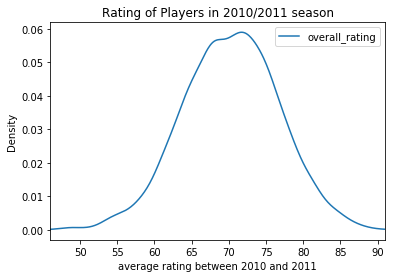

In [22]:
# 从df_player_attributes中获取2010/2011赛季中相关player_api_id的overall_rating值
mask_id = df_player_attributes['player_api_id'].isin(df_match_players['player'])
mask_year = (df_player_attributes['date'] >  '2010-01-01') & \
                (df_player_attributes['date'] <= '2011-12-31')
df_players_rating_1011 = df_player_attributes.loc[mask_id & mask_year][['player_api_id', 'overall_rating']]

# 获取当前时间段所有球员评分的均值, 并画图分析
df_players_rating_1011_mean = df_players_rating_1011.groupby('player_api_id').mean()
xlim_tuple = (df_players_rating_1011_mean['overall_rating'].min(), df_players_rating_1011_mean['overall_rating'].max())
df_players_rating_1011_mean.plot(kind='kde', xlim=xlim_tuple)
plt.xlabel('average rating between 2010 and 2011')
plt.title('Rating of Players in 2010/2011 season')

In [23]:
# 通过图形分析, 不难发现, 球员的总体评分均分普遍在70-75之间, 在这里我们需要找到最右侧的最高分.
# 获取最大评分值
max_player_rating = df_player_attributes['overall_rating'].max()
max_player_api_id = df_player_attributes[ df_player_attributes['overall_rating'] == \
                                          max_player_rating ]['player_api_id'].mean()
max_player_name = df_player[ df_player['player_api_id'] == max_player_api_id]['player_name' ].values[0]
print("The best player in overall_rating between 2010 and 2011 is %s!"%max_player_name)
print("He has a average rating of %.2f"%max_player_rating)

The best player in overall_rating between 2010 and 2011 is Lionel Messi!
He has a average rating of 94.00


In [24]:
# 获取Lionel Messi的team_api_id(可能出现在主场/客场)
try:
    max_team_api_id = df_match_2010to2011.query('home_player_1 == {} or \
                            home_player_2 == {} or \
                            home_player_3 == {} or \
                            home_player_4 == {} or \
                            home_player_5 == {} or \
                            home_player_6 == {} or \
                            home_player_7 == {} or \
                            home_player_8 == {} or \
                            home_player_9 == {} or \
                            home_player_10 == {} or \
                            home_player_11 == {}'.format( max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id, \
                                          max_player_api_id
                            )).head(1).home_team_api_id.iloc[0]
    
except:
    max_team_api_id = df_match_2010to2011.query('away_player_1 == {} or \
                        away_player_2 == {} or \
                        away_player_3 == {} or \
                        away_player_4 == {} or \
                        away_player_5 == {} or \
                        away_player_6 == {} or \
                        away_player_7 == {} or \
                        away_player_8 == {} or \
                        away_player_9 == {} or \
                        away_player_10 == {} or \
                        away_player_11 == {}'.format( max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id, \
                                      max_player_api_id
                        )).head(1).away_team_api_id.iloc[0]

# df_max_team_api_id.head()
print('此球员所在球队的team_api_id : {}'.format(max_team_api_id))

此球员所在球队的team_api_id : 8634


In [25]:
# 通过team_api_id获取到队名
max_team_name = df_team[ df_team[ 'team_api_id' ] == max_team_api_id ].team_long_name.iloc[0]
print('球队名 : {}'.format(max_team_name))

球队名 : FC Barcelona


In [26]:
# 汇总结果, 输出
result = '{}\t{}\t{}'.format(max_player_name, max_player_rating, max_team_name)
sys.stdout.write('球员\t\t评分\t球队\n{}'.format(result))
###############################################################

球员		评分	球队
Lionel Messi	94.0	FC Barcelona

### 研究问题 2（分析胜利与失败球队的球员属性, 他们之间的差距在哪里.）

In [27]:
###############################################################
# 获取所有胜利/失败场次的球队球员
# 此方法用来获取当前df_match当前行中所有home_player_x或away_player_x, 并返回df_result
def get_players(df, player_list):
    flag = True
    for player in player_list:
        if flag:
            df_result = pd.DataFrame(df, columns = [player])
            df_result.columns = ['player']
            flag = False
            continue
            
        df_tmp = pd.DataFrame(df, columns = [player])
        df_tmp.columns = ['player']
        df_result.append(df_tmp)
    return(df_result)
    
# 统计所有胜利/失败的场次, 并获取其球员列表(这里丢弃平局的数据, 只统计胜利与失败)
flag = True
for mid, home, away, hgoal, agoal in zip(df_match['id'], \
                                        df_match['home_team_api_id'], \
                                        df_match['away_team_api_id'], \
                                        df_match['home_team_goal'], \
                                        df_match['away_team_goal']):
    df_line = df_match[df_match['id'] == mid]
    if hgoal > agoal:
        win_players = get_players(df_line, home_player_list)
        fail_players = get_players(df_line, away_player_list)

    elif hgoal < agoal:
        win_players = get_players(df_line, away_player_list)
        fail_players = get_players(df_line, home_player_list)
        
    else:
        continue
        
    if flag:
        df_win_player = win_players
        df_fail_player = fail_players
        flag = False
        continue

    df_win_player = df_win_player.append(win_players)
    df_fail_player = df_fail_player.append(fail_players)


In [28]:
# 球员列表数据去重
df_win_player.drop_duplicates(inplace = True)
df_fail_player.drop_duplicates(inplace = True)

# 到df_player_attributes中获取相关球员信息
mask = df_player_attributes['player_api_id'].isin(df_win_player['player'])
df_win_attributes = df_player_attributes[mask]
mask = df_player_attributes['player_api_id'].isin(df_fail_player['player'])
df_fail_attributes = df_player_attributes[mask]


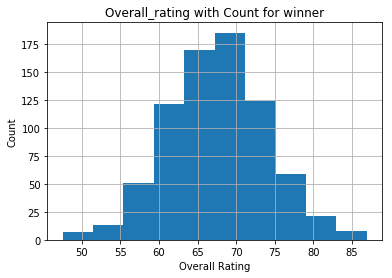

In [29]:
# 获取每个球员的overall_rating均值
df_win_mean = df_win_attributes[['player_api_id', 'overall_rating']].groupby('player_api_id').mean()
df_fail_mean = df_fail_attributes[['player_api_id', 'overall_rating']].groupby('player_api_id').mean()

# 获胜球员的均值绘图
plt.hist(df_win_mean['overall_rating'])
plt.title('Overall_rating with Count for winner')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

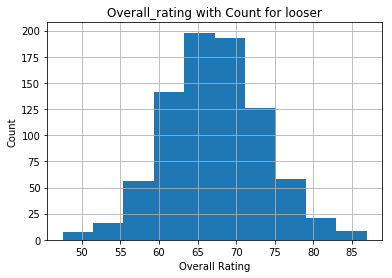

In [30]:
# 失败球员的均值绘图
plt.hist(df_fail_mean['overall_rating'])
plt.title('Overall_rating with Count for looser')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

# 通过对比两图不难发现, 失败的团队总体评分主要集中在70以下, 数据显示的差距并不太大

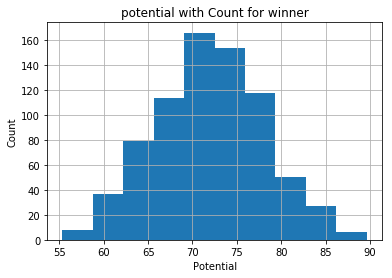

In [31]:
# 获取每个球员的opotential均值
df_win_mean = df_win_attributes[['player_api_id', 'potential']].groupby('player_api_id').mean()
df_fail_mean = df_fail_attributes[['player_api_id', 'potential']].groupby('player_api_id').mean()

# 获胜球员的均值绘图
plt.hist(df_win_mean['potential'])
plt.title('potential with Count for winner')
plt.xlabel('Potential')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

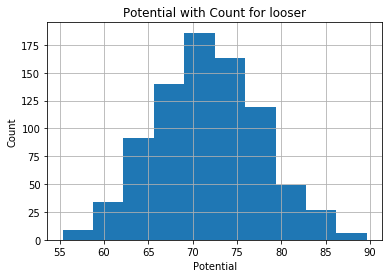

In [32]:
# 失败球员的均值绘图
plt.hist(df_fail_mean['potential'])
plt.title('Potential with Count for looser')
plt.xlabel('Potential')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

# 潜力评分的差距好像也并不明显

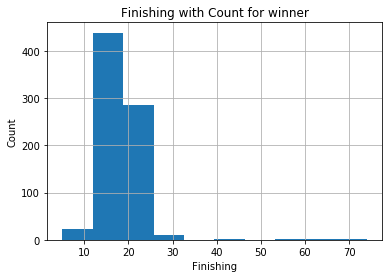

In [33]:
# 获取每个球员的finishing均值
df_win_mean = df_win_attributes[['player_api_id', 'finishing']].groupby('player_api_id').mean()
df_fail_mean = df_fail_attributes[['player_api_id', 'finishing']].groupby('player_api_id').mean()

# 获胜球员的均值绘图
plt.hist(df_win_mean['finishing'])
plt.title('Finishing with Count for winner')
plt.xlabel('Finishing')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

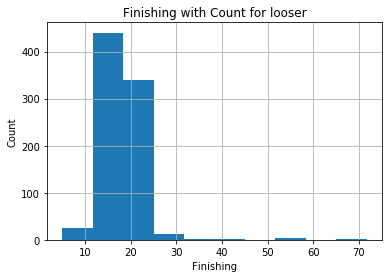

In [34]:
# 失败球员的均值绘图
plt.hist(df_fail_mean['finishing'])
plt.title('Finishing with Count for looser')
plt.xlabel('Finishing')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

# 在射门评分这里, 可以发现, 有比较大的区别, 失败的队伍, 进球率在50%以后的分布明显比获胜的队伍要少

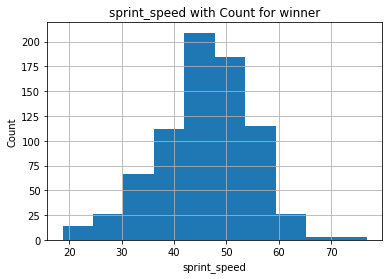

In [35]:
# 获取每个球员的sprint_speed均值
df_win_mean = df_win_attributes[['player_api_id', 'sprint_speed']].groupby('player_api_id').mean()
df_fail_mean = df_fail_attributes[['player_api_id', 'sprint_speed']].groupby('player_api_id').mean()

# 获胜球员的均值绘图
plt.hist(df_win_mean['sprint_speed'])
plt.title('sprint_speed with Count for winner')
plt.xlabel('sprint_speed')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

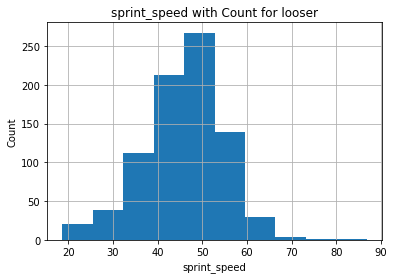

In [36]:
# 失败球员的均值绘图
plt.hist(df_fail_mean['sprint_speed'])
plt.title('sprint_speed with Count for looser')
plt.xlabel('sprint_speed')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

# 在速度评分这里, 很明显的, 失败的队伍被获胜的队伍拉开了许多

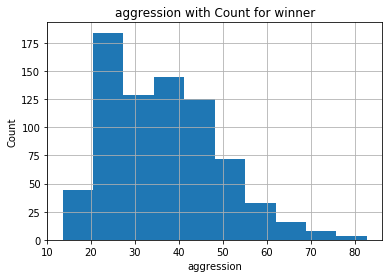

In [37]:
# 获取每个球员的aggression均值
df_win_mean = df_win_attributes[['player_api_id', 'aggression']].groupby('player_api_id').mean()
df_fail_mean = df_fail_attributes[['player_api_id', 'aggression']].groupby('player_api_id').mean()

# 获胜球员的均值绘图
plt.hist(df_win_mean['aggression'])
plt.title('aggression with Count for winner')
plt.xlabel('aggression')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

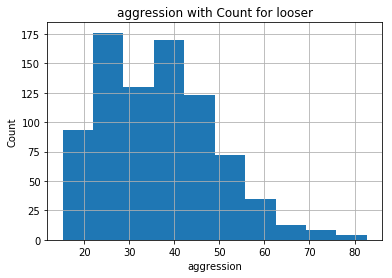

In [38]:
# 失败球员的均值绘图
plt.hist(df_fail_mean['aggression'])
plt.title('aggression with Count for looser')
plt.xlabel('aggression')
plt.ylabel('Count')
plt.grid(True)
plt.legend()
plt.show()

# 侵略性评分, 很明显, 失败的队伍主要集中在中下游水平, 获胜的队伍评分高的球员居多

In [39]:
###############################################################

<a id='conclusions'></a>
## 结论

> **提示**：最后，总结你的调查结果。确保了解探索结果的限制。如果尚未进行任何统计检验，不要做出任何统计结论。切记不要根据相互关系推导出因果关系！

> **提示**：如果对报告满意，应将其副本保存为 HTML 或 PDF 形式。导出报告之前请检查一遍，确保报告流程完整。应删除所有类似的“提示”引用段，以保持报告简洁。还需要查看课程结尾的项目提交页的项目审阅规范。

> 如需将报告导出到工作区，应运行下面的代码框。如果正确，会返回代码 0，工作区目录下会生成 .html 文件（单击左上角的 jupyter 图标）。也可以通过 **文件** > **下载为** 子菜单下载 html 报告，然后手动上传到工作区目录。完成之后，可以单击右下角的“提交项目”，提交你的项目。恭喜！

- 1)2010/2011赛季, 评分表现最佳的球员为FC Barcelona队的Lionel Messi, 评分为94.
- 2)针对所有比赛的获胜/失败方球员进行研究, 发现获胜方队员的射门评分, 速度评分, 侵略性评分高的球员数量比失败方的多.
- 注意: 由于数据限制(数据集大小限制, 属性内容不够丰富)会导致结果造成不同程度的偏差, 这里并没有做出任何结果定论, 只是针对数据进行分析, 评估.

In [40]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1